In [18]:
# Install a conda package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install scikit-learn
!{sys.executable} -m pip install matplotlib

You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
     |████████████████████████████████| 8.5 MB 6.9 MB/s 
     |████████████████████████████████| 61 kB 520 kB/s 
     |████████████████████████████████| 2.2 MB 1.2 MB/s 
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.


In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.linear_model import LinearRegression, LogisticRegression

In [117]:
cumulative_vaccinations = [
    1959151,
    2080280,
    2254556,
    2494371,
    2769164,
    3090058,
    3365492,
    3520056,
    3687206,
    3985579,
    4303730,
    4661293,
    ]

daily_inoculations = []

for i, x in enumerate(cumulative_vaccinations):
    if len(cumulative_vaccinations) > i+1:
        daily_inoculations.append(cumulative_vaccinations[i+1] - x)

daily_inoculations = pd.DataFrame({'date': pd.date_range(start='1/11/2021', end='1/21/2021'), 'delta': daily_inoculations})
daily_inoculations.set_index('date', inplace=True)

In [134]:
print(daily_inoculations.index)

DatetimeIndex(['2021-01-11', '2021-01-12', '2021-01-13', '2021-01-14',
               '2021-01-15', '2021-01-16', '2021-01-17', '2021-01-18',
               '2021-01-19', '2021-01-20', '2021-01-21'],
              dtype='datetime64[ns]', name='date', freq=None)


In [143]:
from datetime import datetime, timedelta
regressor = LinearRegression()
xaxis = np.array([x.timetuple().tm_yday for x in daily_inoculations.index]).reshape(-1, 1)
regressor.fit(X=xaxis, y=daily_inoculations['delta'])

LinearRegression()

In [144]:
prediction_range = range(len(daily_inoculations), 100)
prediction_range_array = np.array(prediction_range).reshape(-1, 1)
projection = regressor.predict(prediction_range_array)
print(projection)

[ 175116.18181818  189222.8         203329.41818182  217436.03636364
  231542.65454545  245649.27272727  259755.89090909  273862.50909091
  287969.12727273  302075.74545455  316182.36363636  330288.98181818
  344395.6         358502.21818182  372608.83636364  386715.45454545
  400822.07272727  414928.69090909  429035.30909091  443141.92727273
  457248.54545455  471355.16363636  485461.78181818  499568.4
  513675.01818182  527781.63636364  541888.25454545  555994.87272727
  570101.49090909  584208.10909091  598314.72727273  612421.34545455
  626527.96363636  640634.58181818  654741.2         668847.81818182
  682954.43636364  697061.05454545  711167.67272727  725274.29090909
  739380.90909091  753487.52727273  767594.14545455  781700.76363636
  795807.38181818  809914.          824020.61818182  838127.23636364
  852233.85454545  866340.47272727  880447.09090909  894553.70909091
  908660.32727273  922766.94545455  936873.56363636  950980.18181818
  965086.8         979193.41818182  99330

In [146]:

prediction_dates = [(datetime(2021, 1, 1) + timedelta(x)) for x in prediction_range]
result_df = pd.DataFrame({'date': prediction_dates, 'delta': projection})
result_df.set_index('date', inplace=True)
print(result_df)

                   delta
date                    
2021-01-12  1.751162e+05
2021-01-13  1.892228e+05
2021-01-14  2.033294e+05
2021-01-15  2.174360e+05
2021-01-16  2.315427e+05
...                  ...
2021-04-06  1.360072e+06
2021-04-07  1.374179e+06
2021-04-08  1.388285e+06
2021-04-09  1.402392e+06
2021-04-10  1.416499e+06

[89 rows x 1 columns]


In [149]:
complete = pd.concat([daily_inoculations, result_df])
print(complete)

<Figure size 432x288 with 0 Axes>

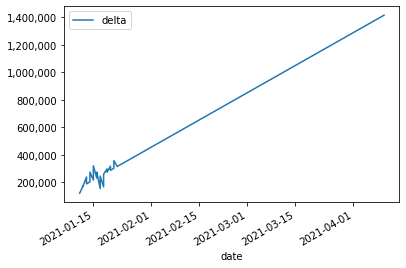

In [151]:
fig = plt.figure()
ax = complete.plot()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

fig.show()